<a href="https://colab.research.google.com/github/Alberto-Huerta/TAREA-2/blob/main/Tarea_2_Parte_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Huerta Díaz Jair Alberto

Ecuaciones Diferenciales Parciales I

Ejercicio I

La solución de la ecuación 
$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}=0$$
sujeta a las condiciones de frontera:

a) $$u(0,y)=u(1,y)=0, \;\;\; t>0$$
$$u(x,0)=100, \;\;\;u(x,1)=200$$
b) $$u(0,y)=0, \;\; \frac{\partial u}{\partial x}|_{x=1}=10y, \;\;u(x,0)=u(x,1)=0$$


Para este ejercicio vamos a dividir y separar las condiciones iniciales en dos casos el primero lo llamaremos $a_1$ y tendremos las siguientes condiciones iniciales.
$$u(0,y)=u(1,y)=0, \;\;\; t>0$$
$$u(x,0)=0, \;\;\;u(x,1)=200$$

Esta dada en términos de la Serie de Fourier por la expresión:
$$u(x,t)=\frac{400}{\pi}\sum_{n=1}^{\infty} \frac{((-1)^{n+1}+1) sinh(n\pi y) sin(nπ x)}{(n\sinh(n\pi))}$$

In [ ]:
from pylab import *
from matplotlib import animation,rc # biblioteca de animacion
from IPython.display import HTML # biblioteca para generar el video
%config InlineBackend.figure_format = 'retina'

Graficamos la condición inicial $u(x,1)=200$

In [ ]:
def f(x):
  y = zeros(len(x))
  for i in range(len(x)):
    y[i] = 200 
  return y

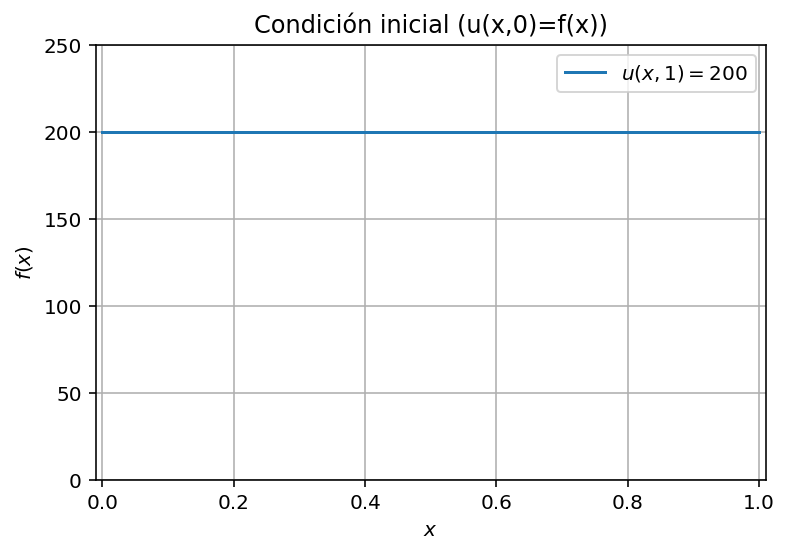

In [ ]:
x = linspace(0,1,1000)
f = f(x)
plot(x,f,label='$u(x,1)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-0.01,250.00]),grid(),legend()
show()

Aplicamos una Serie de Fourier para aproximar la condición inicial $u(x,y)=200$

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += ((-1)**(n+1)+1)*sin(n*pi*x)
    return (400.0/pi)*f

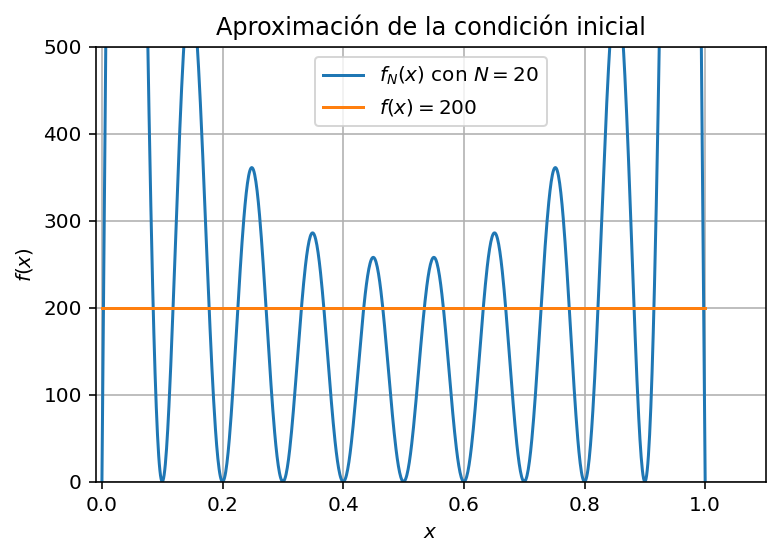

In [ ]:
f_n=u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,500.00]),grid(),legend()
plt.show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

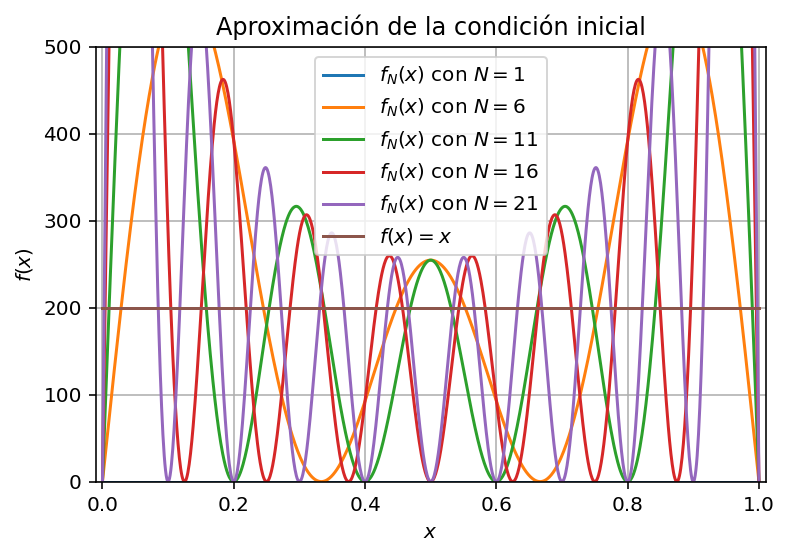

In [ ]:
for i in range(1,22,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,500.0]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $y=0$.

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
      for n in range(1,N):
        f[:,i] += (((-1)**(n+1)+1)*sinh(n*pi*t[i])*sin(n*pi*x))/(n*sinh(n*pi))
    return (400.0/pi)*f

In [ ]:
x = linspace(0,1.0,1000)
t = linspace(0,10.0,1000)
U = u_x_t(x,t)

<ipython-input-358-54ca0b437255>:5: RuntimeWarning: overflow encountered in double_scalars
  f[:,i] += (((-1)**(n+1)+1)*sinh(n*pi*t[i])*sin(n*pi*x))/(n*sinh(n*pi))
<ipython-input-358-54ca0b437255>:5: RuntimeWarning: invalid value encountered in multiply
  f[:,i] += (((-1)**(n+1)+1)*sinh(n*pi*t[i])*sin(n*pi*x))/(n*sinh(n*pi))
<ipython-input-358-54ca0b437255>:5: RuntimeWarning: overflow encountered in sinh
  f[:,i] += (((-1)**(n+1)+1)*sinh(n*pi*t[i])*sin(n*pi*x))/(n*sinh(n*pi))
<ipython-input-358-54ca0b437255>:5: RuntimeWarning: invalid value encountered in double_scalars
  f[:,i] += (((-1)**(n+1)+1)*sinh(n*pi*t[i])*sin(n*pi*x))/(n*sinh(n*pi))


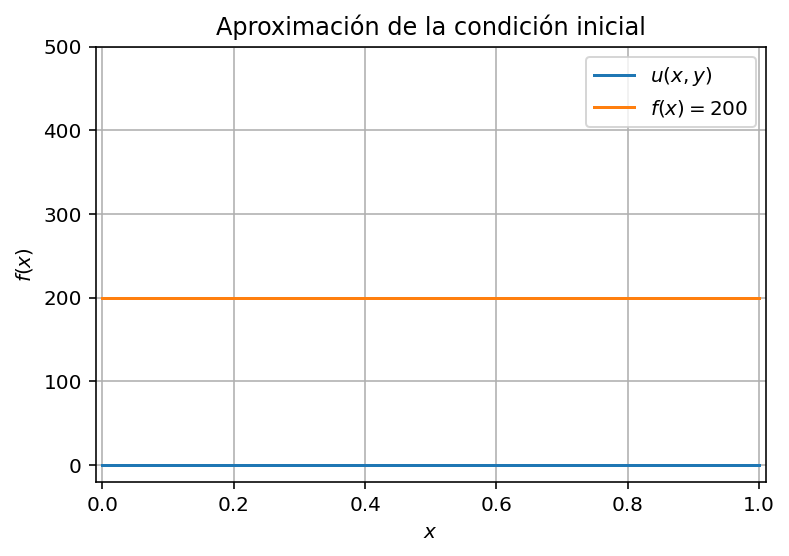

In [ ]:
plot(x,U[:,0],label='$u(x,y)$')
plot(x,f,label='$f(x)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-20.01,500.0]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando  $y→∞$ .

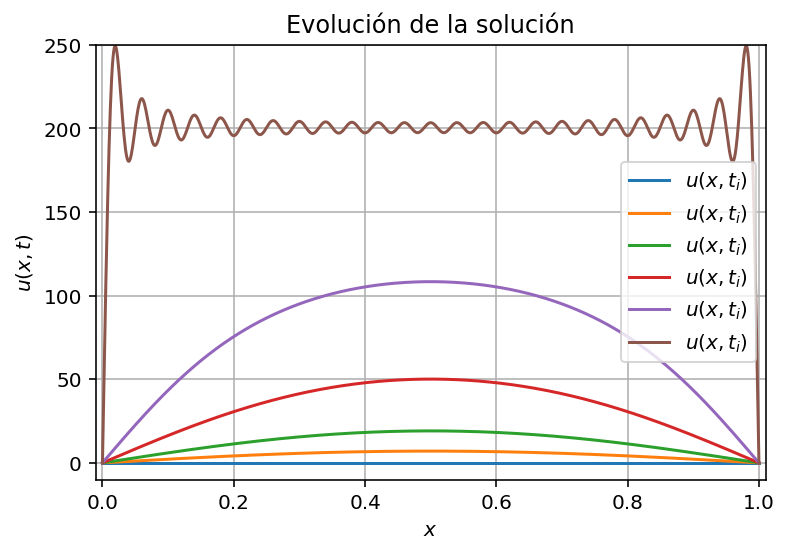

In [ ]:
plot(x,U[:,0],label='$u(x,t_i)$') # Mejorar
plot(x,U[:,10],label='$u(x,t_i)$')
plot(x,U[:,25],label='$u(x,t_i)$')
plot(x,U[:,50],label='$u(x,t_i)$')
plot(x,U[:,75],label='$u(x,t_i)$')
plot(x,U[:,100],label='$u(x,t_i)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-10.01,250.00]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

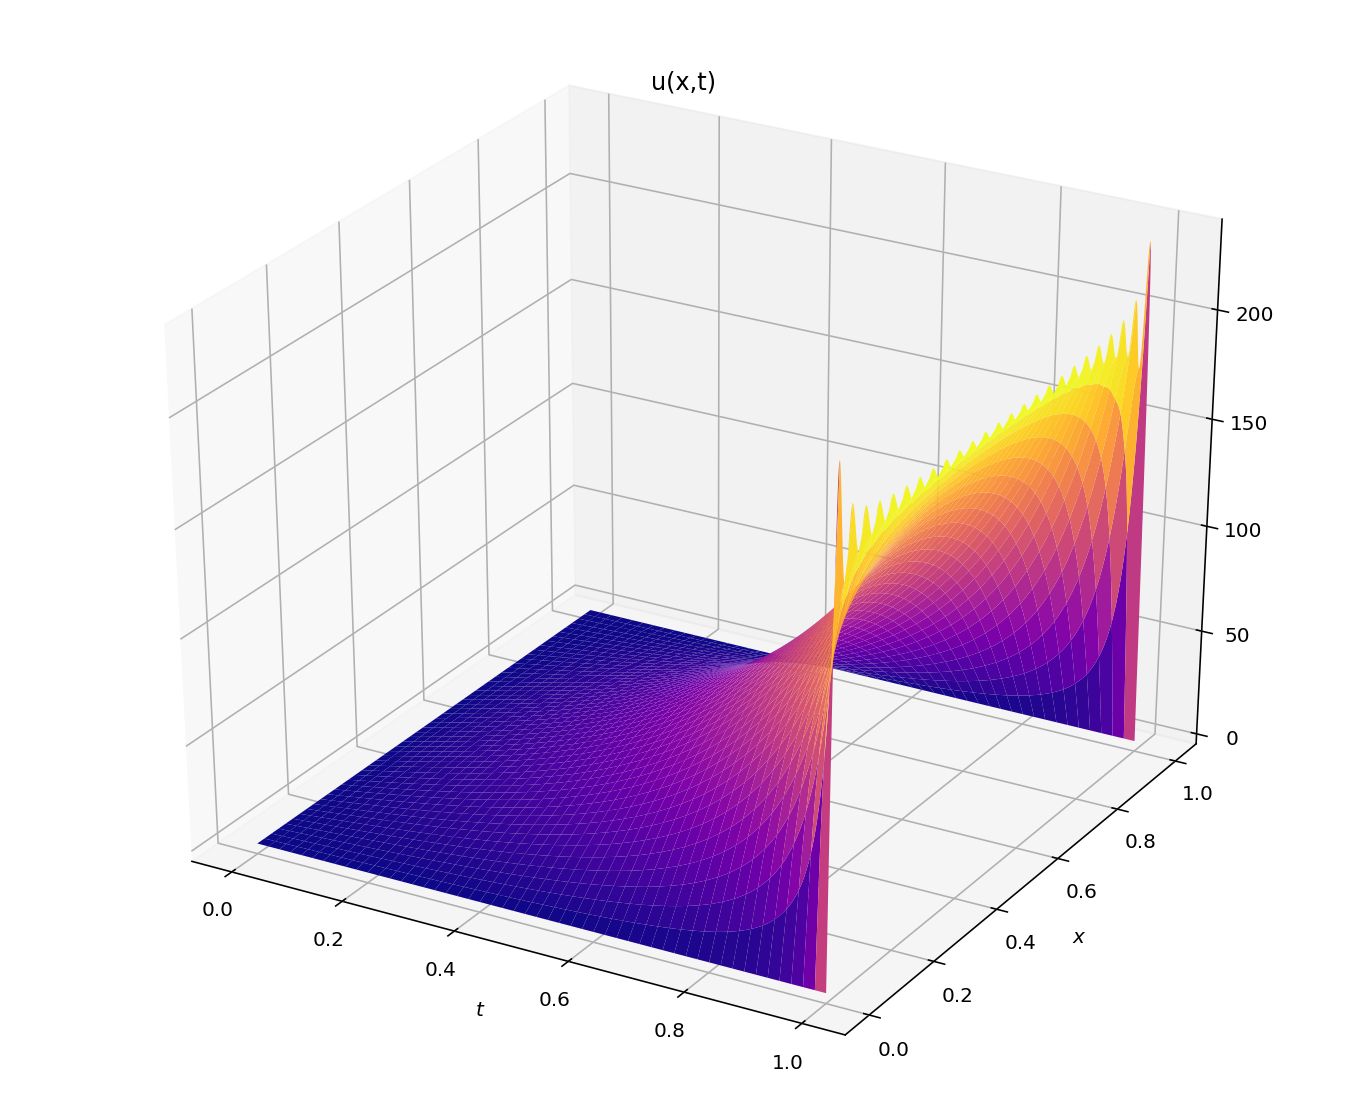

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,1000)
t = linspace(0,1.0,1000)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="plasma"); #Otros colores:"viridis", "inferno", "plasma"

Para la otra parte del ejercicio $a_2$ vamos a modificar nuevamente las condiciones iniciales.
$$u(0,y)=u(1,y)=0, \;\;\; t>0$$
$$u(x,0)=100, \;\;\;u(x,1)=0$$

In [ ]:
def g(x):
  y = zeros(len(x))
  for i in range(len(x)):
    y[i] = 100 
  return y

Graficamos la condición incial

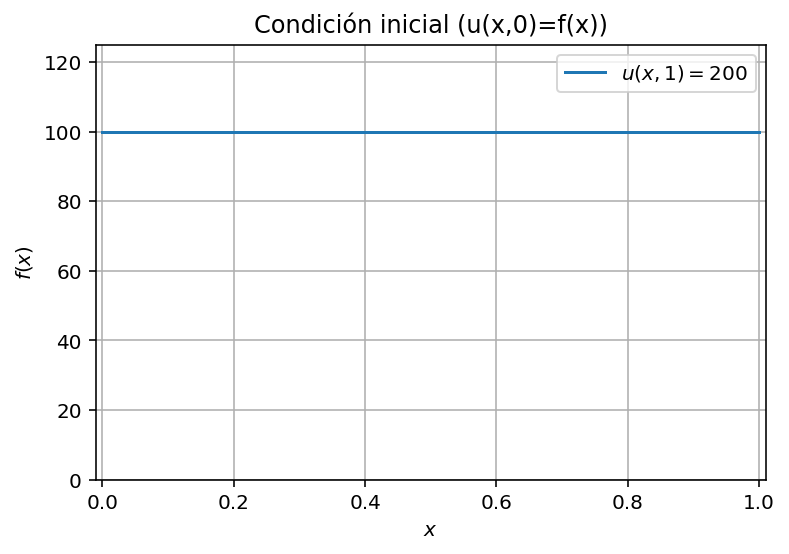

In [ ]:
x = linspace(0,1,1000)
g = g(x)
plot(x,g,label='$u(x,1)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-0.01,125.00]),grid(),legend()
show()

Aplicamos una Serie de Fourier para aproximar la condición inicial $u(x,y)=100$

In [ ]:
def v_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (((-1)**(n+1)+1)*sin(n*pi*x))/n
    return (200.0/pi)*f

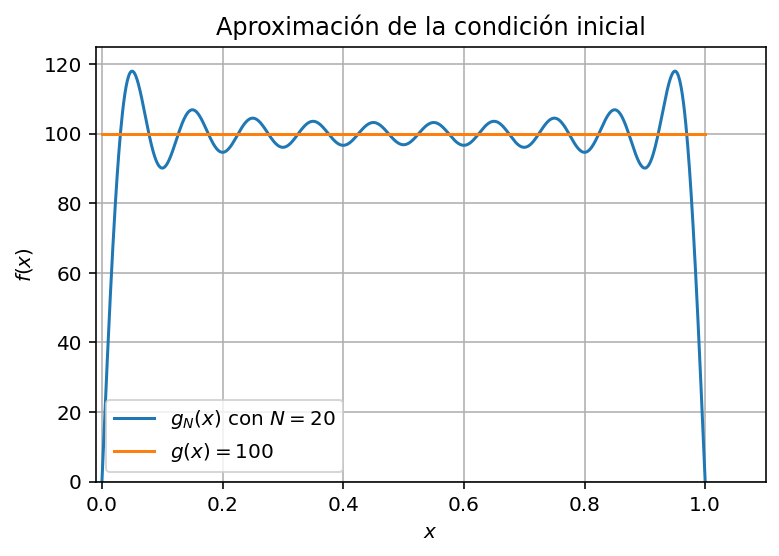

In [ ]:
g_n=v_0(x)
plot(x,g_n,label='$g_N(x)$ con $N=20$')
plot(x,g,label='$g(x)=100$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,125.00]),grid(),legend()
plt.show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

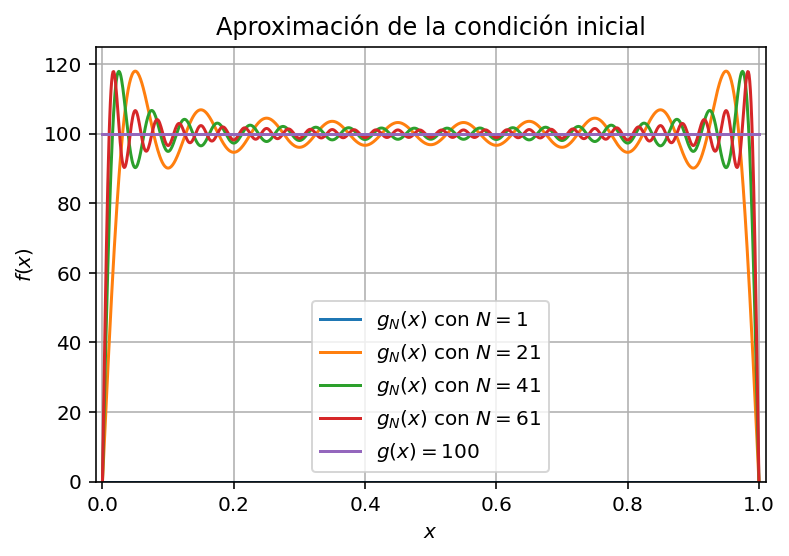

In [ ]:
for i in range(1,62,20):
    plot(x,v_0(x,i),label='$g_N(x)$ con $N=%d$' %i)
plot(x,g,label='$g(x)=100$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,125.0]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $y=0$.

In [ ]:
def v_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
      for n in range(1,N):
        f[:,i] += (((-1)**(n+1)+1)*(tanh(n*pi)*sinh(n*pi*t[i])+cosh(n*pi*t[i]))*sin(n*pi*x))/n
    return (200.0/pi)*f

In [ ]:
x = linspace(0,1.0,1000)
t = linspace(0,1.0,1000)
V = v_x_t(x,t)

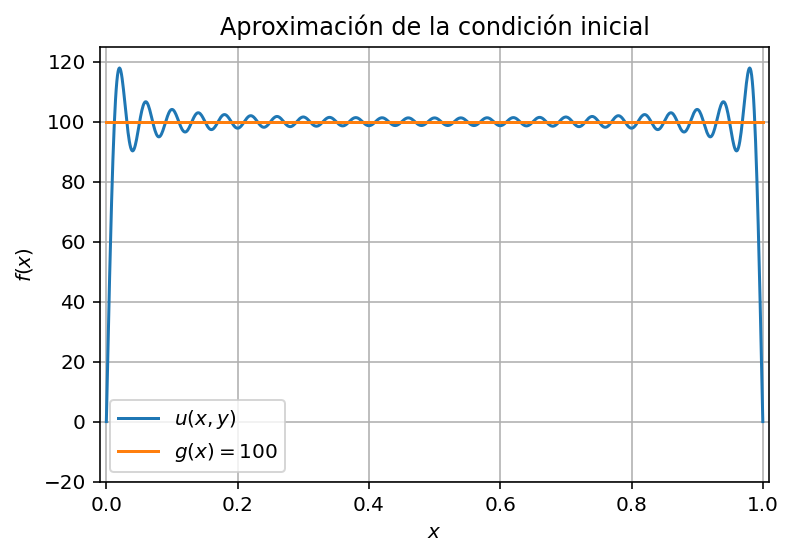

In [ ]:
plot(x,V[:,0],label='$u(x,y)$')
plot(x,g,label='$g(x)=100$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-20.01,125.0]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando  $y→∞$ .

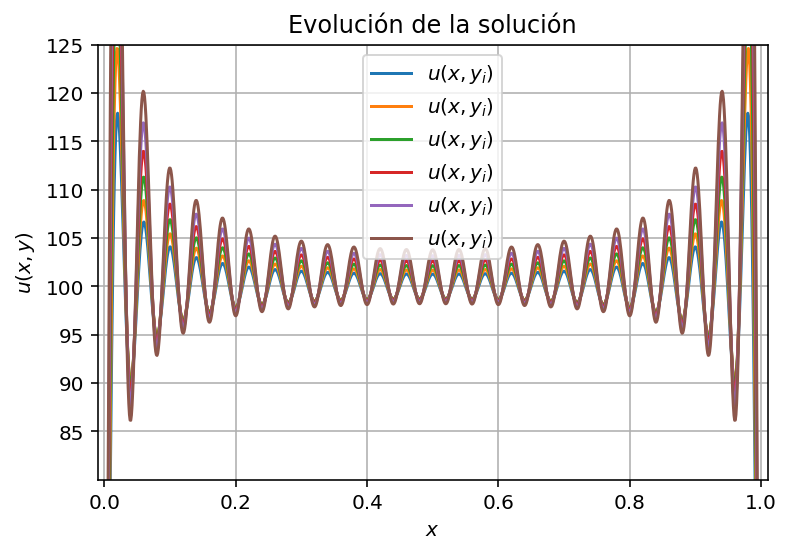

In [ ]:
plot(x,V[:,0],label='$u(x,y_i)$') # Mejorar
plot(x,V[:,1],label='$u(x,y_i)$')
plot(x,V[:,2],label='$u(x,y_i)$')
plot(x,V[:,3],label='$u(x,y_i)$')
plot(x,V[:,4],label='$u(x,y_i)$')
plot(x,V[:,5],label='$u(x,y_i)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([80.01,125.00]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

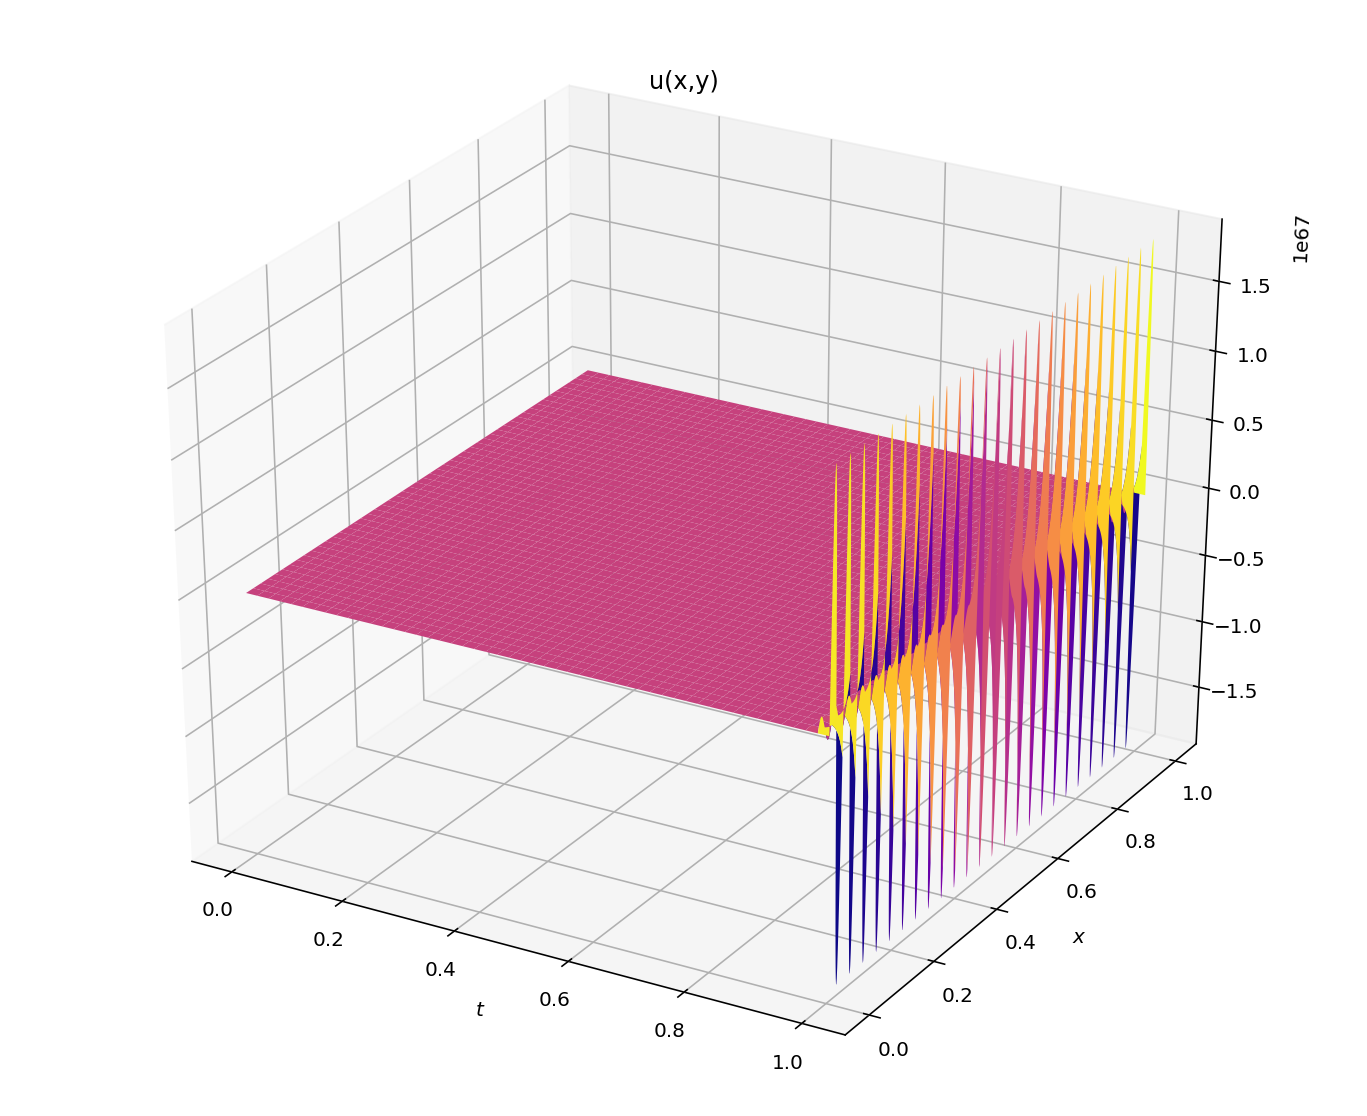

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,1000)
t = linspace(0,1.0,1000)

X,T = np.meshgrid(x,t)

V = v_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,y)")
ax.plot_surface(X, T, V, cmap="plasma"); #Otros colores:"viridis", "inferno", "plasma"

Finalmente una vez teniendo las dos sumatorias del inciso $a_1,a_2$ vamos a sumar ambas para tener la solución general del inciso a

In [ ]:
def f(x):
  y = zeros(len(x))
  for i in range(len(x)):
    y[i] = 200 
  return y

Graficamos la condición inicial 

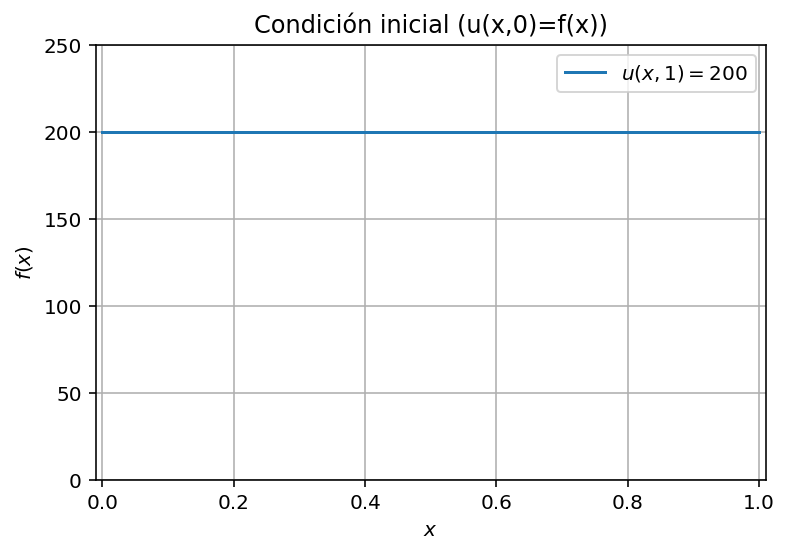

In [ ]:
x = linspace(0,1,1000)
f = f(x)
plot(x,f,label='$u(x,1)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-0.01,250.00]),grid(),legend()
show()

Aplicamos la Serie de Fourier para aproximar la condición inicial $u(x,y)=200$

In [ ]:
def w_0(x,N=8): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += ((((-1)**(n+1)+1)*sin(n*pi*x))/n)*(2+tanh(n*pi)*sinh(n*pi)+cosh(n*pi))
    return (200.0/pi)*f

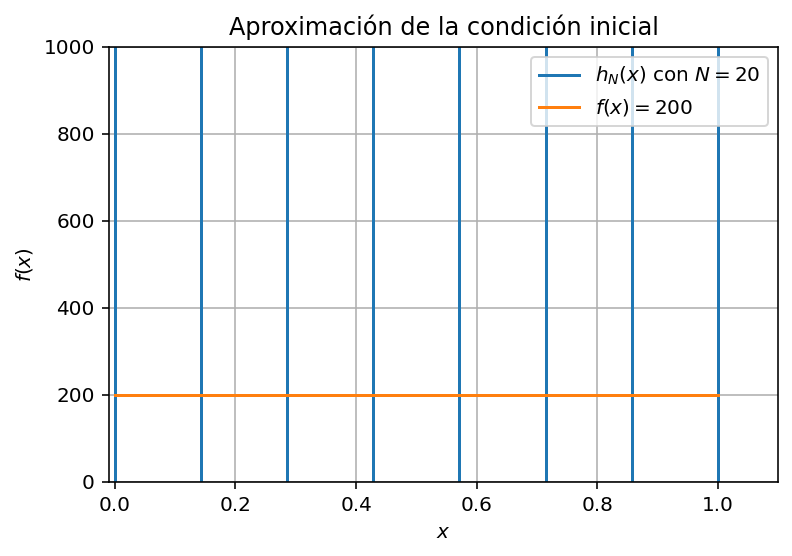

In [ ]:
h_n=w_0(x)
plot(x,h_n,label='$h_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=200$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,1000.00]),grid(),legend()
plt.show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

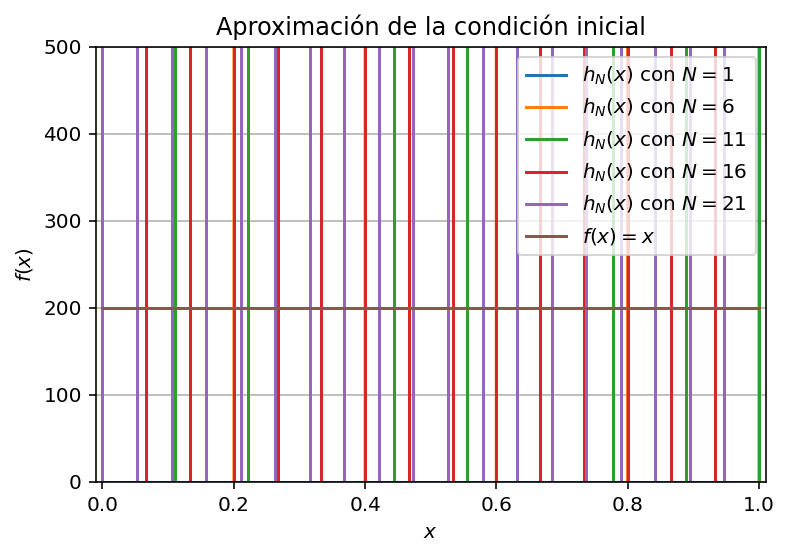

In [ ]:
for i in range(1,22,5):
    plot(x,w_0(x,i),label='$h_N(x)$ con $N=%d$' %i)
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,500.0]),grid(),legend()
show()

Definimos una nueva función

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $y=0$.

In [ ]:
def w_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
      for n in range(1,N):
        f[:,i] += ((((-1)**(n+1)+1)*sin(n*pi*x))/n)*((2*sinh(n*pi*t[i]))/sinh(n*pi)+tanh(n*pi)*sinh(n*pi*t[i])+cosh(n*pi*t[i]))
    return (200.0/pi)*f

In [ ]:
x = linspace(0,1.0,1000)
t = linspace(0,1.0,1000)
W = w_x_t(x,t)


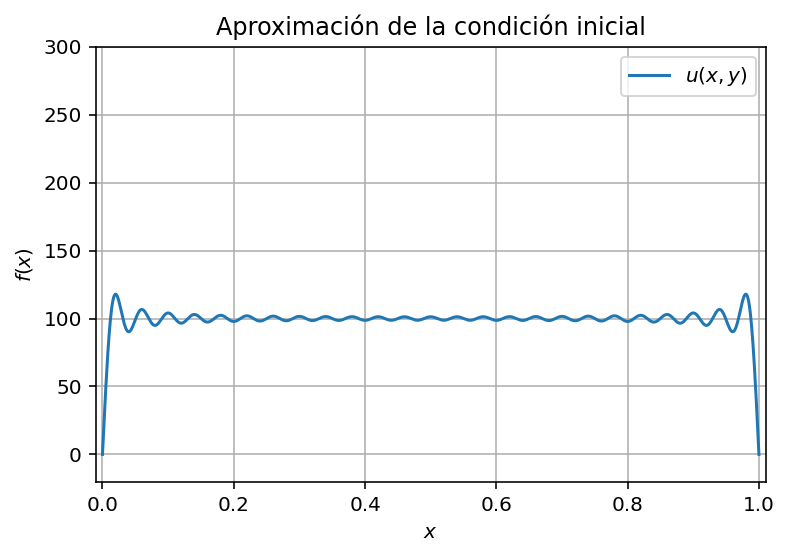

In [ ]:
plot(x,W[:,0],label='$u(x,y)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-20.01,300.0]),grid(),legend()
show()

Luego, para diferentes valores de y, lo cual nos permite ver cómo la solución evoluciona cuando  $y→∞$ .

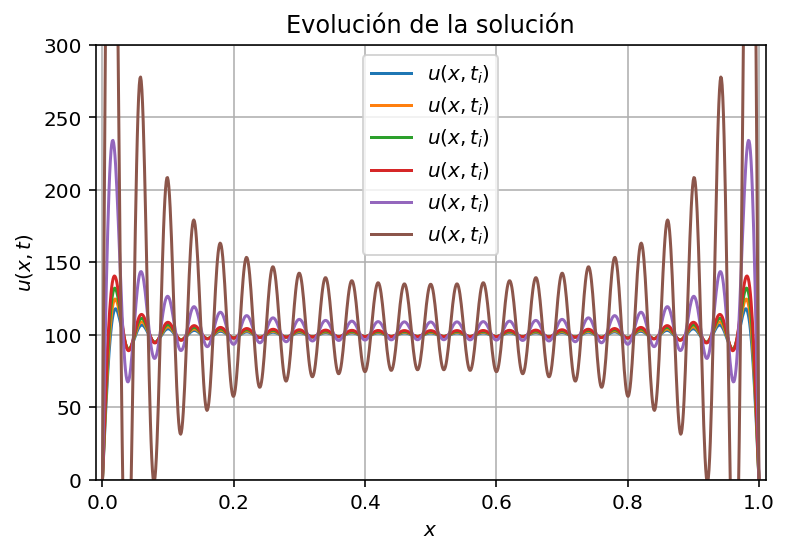

In [ ]:
plot(x,W[:,0],label='$u(x,t_i)$') # Mejorar
plot(x,W[:,1],label='$u(x,t_i)$')
plot(x,W[:,2],label='$u(x,t_i)$')
plot(x,W[:,3],label='$u(x,t_i)$')
plot(x,W[:,10],label='$u(x,t_i)$')
plot(x,W[:,20],label='$u(x,t_i)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,300.2]),grid(),legend()
show()

Visualizando la gráfica en 3D

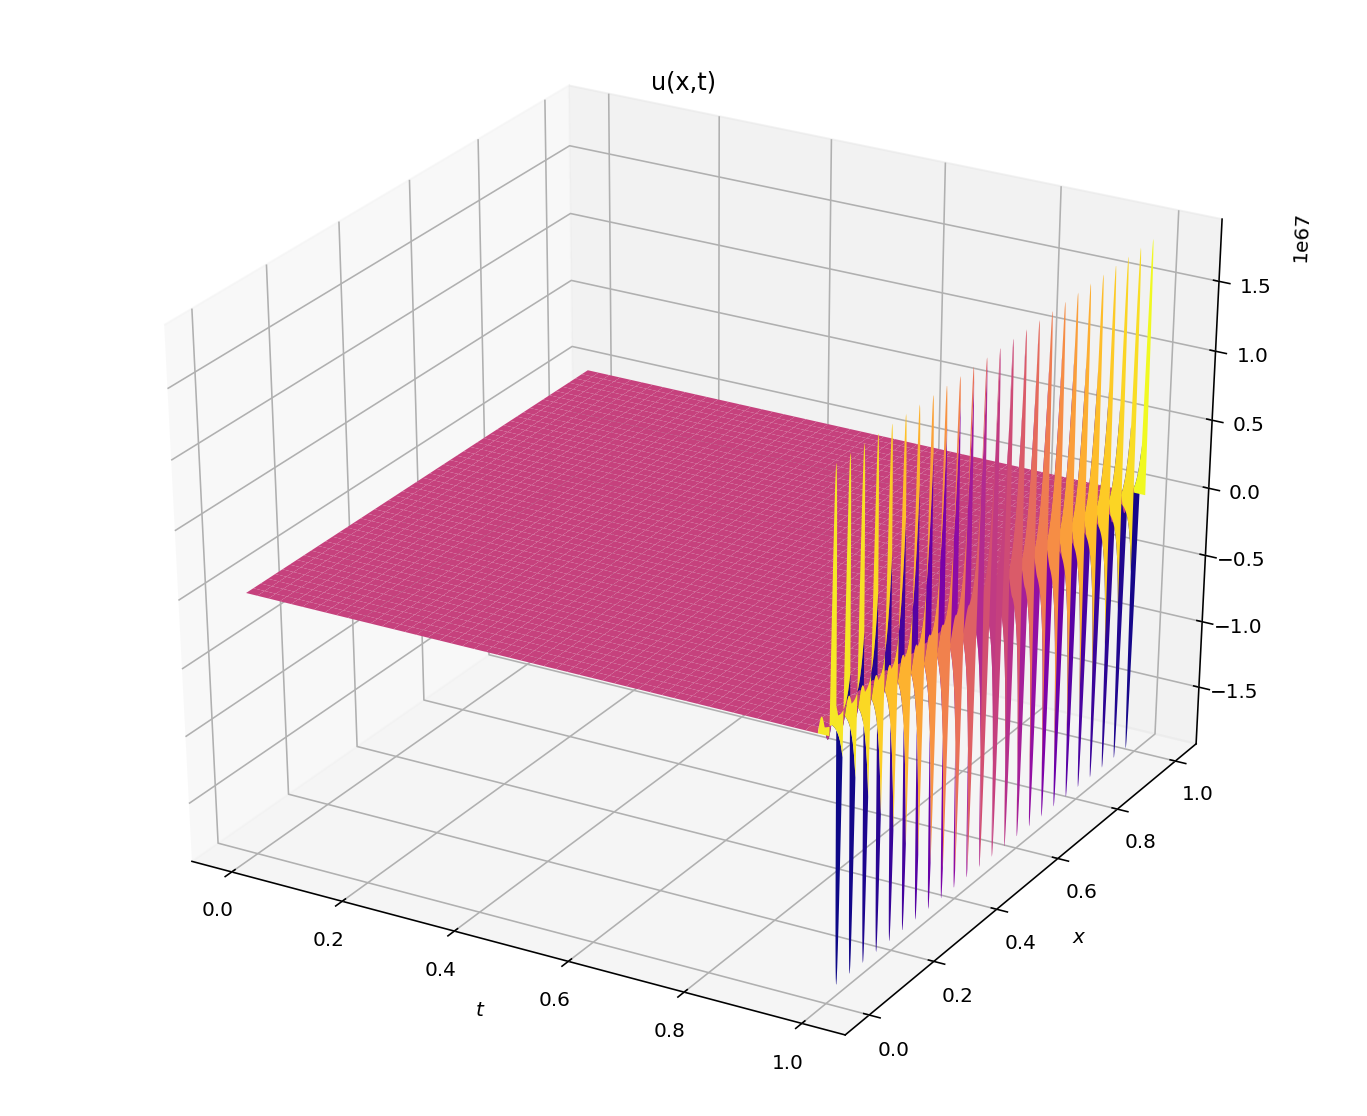

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,1000)
t = linspace(0,1.0,1000)

X,T = np.meshgrid(x,t)

W = w_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, W, cmap="plasma"); #Otros colores:"viridis", "inferno", "plasma"